In [41]:
import time
st_time=time.perf_counter()

In [42]:
import pandas as pd
import matplotlib as plt
import numpy as np

成绩信息处理

In [43]:
f_read=open(r'.\bks_cjxx_out111.csv',encoding='ansi')
cjxx1=pd.read_csv(f_read)
f_read=open(r'.\bks_cjxx_out222.csv',encoding='ansi')
cjxx2=pd.read_csv(f_read)
cjxx=pd.concat([cjxx1,cjxx2],axis=0,ignore_index = True)
cjxx.head()
print(type(cjxx))
cjxx=cjxx.sort_values(by='xh')
#print(cjxx.duplicated())#判断是否有重复行，重复的显示为TRUE，
cjxx=cjxx.drop_duplicates()#去掉重复行

<class 'pandas.core.frame.DataFrame'>


In [44]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

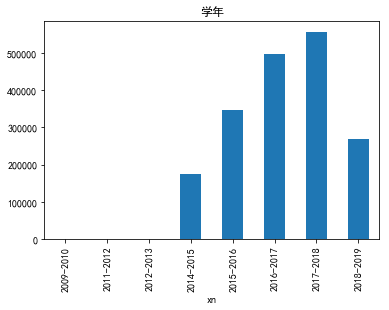

In [45]:
fenlei_data=cjxx.groupby('xn').size()
fenlei_data.plot.bar(title='学年')

In [46]:
data_cjs = cjxx.loc[:,["xh","fslkscj","xf","kcsxdm","kch"]]
#data_cjs.head()
data_cjs000=data_cjs
data_cjs["cjs"]=0
data_cjs["cjs"] = data_cjs.apply(lambda x: x["fslkscj"]*x["xf"],axis=1)
data_cjs.head()

def jdtj(x):
    x["cjs"]=round(x["cjs"].sum()/x["xf"].sum(),1)
    return x
data_cjs=data_cjs.groupby("xh").apply(jdtj)
#data_cjs.head()

data_cjs=data_cjs.groupby("xh")["cjs"].mean()
#data_cjs.head()

dict_cjs = {'XH':data_cjs.index,'cj':data_cjs.values}
data_cjs = pd.DataFrame(dict_cjs)
data_cjs.head()

,XH,cj
0,21501782,0.0
1,21503672,90.3
2,21505250,39.9
3,21507642,63.0
4,21517260,92.0


In [47]:
del cjxx
del cjxx1
del cjxx2#free

In [48]:
data_cjs000=data_cjs000.loc[data_cjs000.fslkscj<= 100,:]

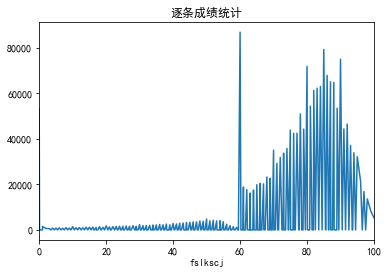

In [49]:
fenlei_data000=data_cjs000.groupby("fslkscj").size()
fenlei_data000.plot(title='逐条成绩统计')

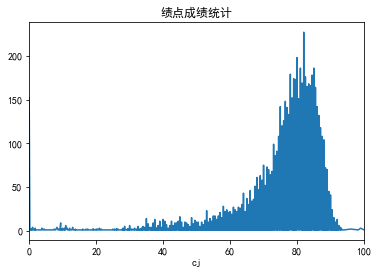

In [50]:
fenlei_data=data_cjs.groupby('cj').size()
fenlei_data.plot(title='绩点成绩统计')

玉兰卡消费数据处理

1、数据分类处理

In [51]:
f_read=open(r'.\ykt_jyrz_lishi.txt',encoding='utf-8')
ylkxx=pd.read_csv(f_read,sep=';')
#file.columns = ['XH','JYLX','JYRQ','JYSJ','JYDD','SHDM','ZDJH','LJYKCS','JYYE']
ylkxx.head()

,XH,JYLX,JYJE,JYRQ,JYSJ,JYDD,SHDM,SHMC,ZDJH,LJYKCS,JYYE
0,201415178,持卡人消费,84,2019-04-27,2019/04/27 15:24:38.000000000,西山浴室,243000010,西山浴室,1297,2631,4306
1,201415178,持卡人消费,350,2019-04-27,2019/04/27 15:13:16.000000000,西山浴室,243000010,西山浴室,1297,2606,4390
2,201415178,持卡人消费,147,2019-04-23,2019/04/23 19:09:11.000000000,西山浴室,243000010,西山浴室,1263,2595,4740
3,201415178,持卡人消费,35,2019-04-23,2019/04/23 19:07:14.000000000,西山浴室,243000010,西山浴室,1263,2592,4887
4,201415178,持卡人消费,476,2019-04-23,2019/04/23 18:52:53.000000000,西山浴室,243000010,西山浴室,1263,2558,4922


In [52]:
data_ylk=ylkxx.loc[:,["XH","JYJE","JYSJ","JYDD"]]
data_ylk=data_ylk.sort_values(by='XH')
#print(cjxx.duplicated())#判断是否有重复行，重复的显示为TRUE，
data_ylk=data_ylk.drop_duplicates()#去掉重复行
data_ylk.head()

,XH,JYJE,JYSJ,JYDD
109385,201400001,1900,2019/04/28 13:56:41.000000000,大学生超市
109380,201400001,36,2019/04/29 10:58:56.000000000,西山热水器
109381,201400001,6,2019/04/29 10:57:55.000000000,西山热水器
109382,201400001,350,2019/04/29 10:57:33.000000000,卢工洗衣机
109383,201400001,39,2019/04/28 22:41:43.000000000,西山热水器


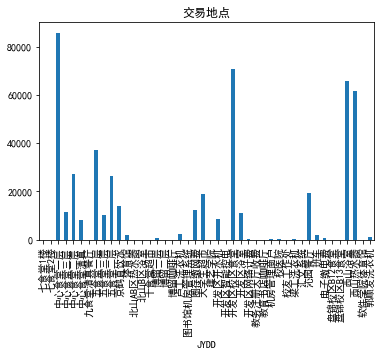

In [53]:
fenlei_data=data_ylk.groupby('JYDD').size()
fenlei_data.plot.bar(title='交易地点')

In [54]:
ylk_rsq=data_ylk.loc[data_ylk.JYDD == "西山热水器",['XH','JYSJ','JYDD']]
#ylk_rsq.head()#西山热水器信息提取ylk_rsq
ylk_dc=data_ylk.loc[data_ylk.JYDD == "大学生超市",['XH','JYJE','JYSJ','JYDD']]
#ylk_dc.head()#大超信息提取ylk_dc

In [55]:
ylk_dc.head()

,XH,JYJE,JYSJ,JYDD
109385,201400001,1900,2019/04/28 13:56:41.000000000,大学生超市
109401,201400001,200,2019/04/26 08:29:44.000000000,大学生超市
109378,201400001,380,2019/04/29 16:35:04.000000000,大学生超市
109375,201400001,50,2019/04/29 17:14:46.000000000,大学生超市
332471,201400003,1800,2019/04/29 18:56:01.000000000,大学生超市


In [56]:
ylk_st= data_ylk[data_ylk['JYDD'].str.contains("食堂")] #食堂信息提取
ylk_st.head()

,XH,JYJE,JYSJ,JYDD
109386,201400001,50,2019/04/28 09:19:49.000000000,中心食堂一层
109387,201400001,50,2019/04/28 09:19:43.000000000,中心食堂一层
109388,201400001,150,2019/04/28 09:19:26.000000000,中心食堂一层
109411,201400001,600,2019/04/23 18:58:34.000000000,中心食堂一层
109410,201400001,130,2019/04/23 19:05:42.000000000,中心食堂一层


#################计算成绩名次32365人次

成绩高于#算作成绩较好的学生

In [57]:
datasort=data_cjs.sort_values(by='cj')
datasort[27510:27511]#成绩在前15%的分数

,XH,cj
10005,201533080,85.6


In [58]:
print("有记录的同学的平均分")
print(data_cjs["cj"].mean())
#data_cjs_good=data_cjs.loc[data_cjs.cj >= 85.6,:]
#data_cjs_good.head()

有记录的同学的平均分
75.33030349857857


2、考察在熄灯后有打热水的同学与成绩

In [59]:
ylk_rsq.head()

,XH,JYSJ,JYDD
109380,201400001,2019/04/29 10:58:56.000000000,西山热水器
109381,201400001,2019/04/29 10:57:55.000000000,西山热水器
109383,201400001,2019/04/28 22:41:43.000000000,西山热水器
109384,201400001,2019/04/28 22:41:25.000000000,西山热水器
109409,201400001,2019/04/23 23:28:31.000000000,西山热水器


In [60]:
#print("2019/04/23 18:58:34.000000000" > "2019/04/22 18:58:35.000000000">"2019/04/21 18:58:35.000000000")#日期可以比较大小
#备份
ylk_rsq000=ylk_rsq

In [61]:
from datetime import datetime
ylk_rsq["JYSJS"]=pd.to_datetime(ylk_rsq.JYSJ,format="%Y/%m/%d %H:%M:%S")
ylk_rsq["JYSJS"]=ylk_rsq.apply(lambda x: datetime.strftime(x["JYSJS"],"%H:%M:%S"),axis=1)
ylk_rsq.head()

,XH,JYSJ,JYDD,JYSJS
109380,201400001,2019/04/29 10:58:56.000000000,西山热水器,10:58:56
109381,201400001,2019/04/29 10:57:55.000000000,西山热水器,10:57:55
109383,201400001,2019/04/28 22:41:43.000000000,西山热水器,22:41:43
109384,201400001,2019/04/28 22:41:25.000000000,西山热水器,22:41:25
109409,201400001,2019/04/23 23:28:31.000000000,西山热水器,23:28:31


In [62]:
ylk_rsq0_data=ylk_rsq.groupby('XH').size()
ylk_rsq0_data.head()#计算每个人打水次数
dict_ylk_rsq0_data = {'XH':ylk_rsq0_data.index,'times':ylk_rsq0_data.values}
ylk_rsq0_data = pd.DataFrame(dict_ylk_rsq0_data)
ylk_rsq0_data.head()

,XH,times
0,201400001,24
1,201400002,8
2,201400003,1
3,201400004,17
4,201400008,2


In [63]:
ylk_rsq0_data["XH"] =ylk_rsq0_data["XH"].astype("int64")

In [64]:
ylk_rsq1=ylk_rsq.loc[ylk_rsq.JYSJS >= "22:45:00",:]
ylk_rsq1.head()

,XH,JYSJ,JYDD,JYSJS
109409,201400001,2019/04/23 23:28:31.000000000,西山热水器,23:28:31
109408,201400001,2019/04/23 23:28:48.000000000,西山热水器,23:28:48
109404,201400001,2019/04/25 23:23:05.000000000,西山热水器,23:23:05
109403,201400001,2019/04/25 23:23:47.000000000,西山热水器,23:23:47
109402,201400001,2019/04/25 23:25:45.000000000,西山热水器,23:25:45


In [65]:
ylk_rsq1_data=ylk_rsq1.groupby('XH').size()
#有熄灯后打水记录的人次数
dict_ylk_rsq1_data = {'XH':ylk_rsq1_data.index,'time':ylk_rsq1_data.values}
ylk_rsq1_data = pd.DataFrame(dict_ylk_rsq1_data)
ylk_rsq1_data.head()

,XH,time
0,201400001,11
1,201400002,1
2,201400009,1
3,201404119,1
4,201404159,3


In [66]:
ylk_rsq1_data["XH"] =ylk_rsq1_data["XH"].astype("int64")
data_cjs.head()

,XH,cj
0,21501782,0.0
1,21503672,90.3
2,21505250,39.9
3,21507642,63.0
4,21517260,92.0


In [67]:
h_rsq = pd.merge(ylk_rsq1_data,ylk_rsq0_data,how="inner",on="XH")
h_rsq=pd.merge(h_rsq,data_cjs,how="inner",on="XH")
h_rsq["%"]=0 
h_rsq["%"]= h_rsq.apply(lambda x: x["time"]/x["times"]*100,axis=1)
h_rsq.head()

,XH,time,times,cj,%
0,201400001,11,24,52.8,45.833333
1,201400002,1,8,43.3,12.500000
2,201400009,1,7,76.3,14.285714
3,201404119,1,10,46.4,10.000000
4,201404159,3,6,78.4,50.000000


In [68]:
h_rsq["%"]=0 
h_rsq["%"]= h_rsq.apply(lambda x: x["time"]/x["times"]*100,axis=1)
h_rsq.sort_values(by='%')
print("有熄灯后打水行为的平均分")
print(h_rsq["cj"].mean())

有熄灯后打水行为的平均分
78.19507700770079


In [69]:
print("所有数据库有记录的同学的平均分")
print(data_cjs["cj"].mean())
#data_cjs_good=data_cjs.loc[data_cjs.cj >= 85.6,:]
#data_cjs_good.head()

所有数据库有记录的同学的平均分
75.33030349857857


3、考察同学们在大超消费时段与金额与成绩

In [70]:
ylk_dc000=ylk_dc

In [71]:
ylk_dc=ylk_dc000

In [72]:
ylk_dc["XH"] =ylk_dc["XH"].astype("int64")
ylk_dc = pd.merge(ylk_dc,data_cjs,how="inner",on="XH")
ylk_dc.head()
ylk_dc["!"]=0    #85.6分信息标记
ylk_dc.head()
def jud(x):
    if x["cj"]>=85.6:
        x["!"]=1
    else:x["!"]=0
    return x
ylk_dc=ylk_dc.apply(jud,axis=1)
ylk_dc.head()

,XH,JYJE,JYSJ,JYDD,cj,!
0,201400001,1900,2019/04/28 13:56:41.000000000,大学生超市,52.8,0
1,201400001,200,2019/04/26 08:29:44.000000000,大学生超市,52.8,0
2,201400001,380,2019/04/29 16:35:04.000000000,大学生超市,52.8,0
3,201400001,50,2019/04/29 17:14:46.000000000,大学生超市,52.8,0
4,201400003,1800,2019/04/29 18:56:01.000000000,大学生超市,76.6,0


In [73]:
ylk_dc.head()

,XH,JYJE,JYSJ,JYDD,cj,!
0,201400001,1900,2019/04/28 13:56:41.000000000,大学生超市,52.8,0
1,201400001,200,2019/04/26 08:29:44.000000000,大学生超市,52.8,0
2,201400001,380,2019/04/29 16:35:04.000000000,大学生超市,52.8,0
3,201400001,50,2019/04/29 17:14:46.000000000,大学生超市,52.8,0
4,201400003,1800,2019/04/29 18:56:01.000000000,大学生超市,76.6,0


In [74]:
ylk_dc["JYSJS"]=pd.to_datetime(ylk_dc.JYSJ,format="%Y/%m/%d %H:%M:%S")
ylk_dc["JYSJS"]=ylk_dc.apply(lambda x: datetime.strftime(x["JYSJS"],"%H:%M:%S"),axis=1)
ylk_dc.head()

,XH,JYJE,JYSJ,JYDD,cj,!,JYSJS
0,201400001,1900,2019/04/28 13:56:41.000000000,大学生超市,52.8,0,13:56:41
1,201400001,200,2019/04/26 08:29:44.000000000,大学生超市,52.8,0,08:29:44
2,201400001,380,2019/04/29 16:35:04.000000000,大学生超市,52.8,0,16:35:04
3,201400001,50,2019/04/29 17:14:46.000000000,大学生超市,52.8,0,17:14:46
4,201400003,1800,2019/04/29 18:56:01.000000000,大学生超市,76.6,0,18:56:01


In [75]:
ylk_dc.sort_values(by='JYSJS').head()

,XH,JYJE,JYSJ,JYDD,cj,!,JYSJS
18082,201856037,200,2019/04/24 06:31:09.000000000,大学生超市,87.6,1,06:31:09
7685,201636217,1150,2019/04/25 06:33:35.000000000,大学生超市,54.9,0,06:33:35
18716,201886112,350,2019/04/24 06:35:24.000000000,大学生超市,79.7,0,06:35:24
866,201505123,1600,2019/04/26 06:35:29.000000000,大学生超市,66.7,0,06:35:29
16604,201815179,1150,2019/04/24 06:37:22.000000000,大学生超市,84.3,0,06:37:22


In [76]:
#print("按时间切片")
ylk_dc6=ylk_dc.loc[(ylk_dc.JYSJS < "07:00:00")&(ylk_dc.JYSJS >= "06:00:00"),:]
#print("6:00-7:00")
#print(ylk_dc6.JYSJS.count())
ylk_dc7=ylk_dc.loc[(ylk_dc.JYSJS < "08:00:00")&(ylk_dc.JYSJS >= "07:00:00"),:]
#print("7:00-8:00")
#print(ylk_dc7.JYSJS.count())
ylk_dc8=ylk_dc.loc[(ylk_dc.JYSJS < "09:00:00")&(ylk_dc.JYSJS >= "08:00:00"),:]
#print("8:00-9:00")
#print(ylk_dc8.JYSJS.count())
ylk_dc9=ylk_dc.loc[(ylk_dc.JYSJS < "10:00:00")&(ylk_dc.JYSJS >= "09:00:00"),:]
#print("9:00-10:00")
#print(ylk_dc9.JYSJS.count())
ylk_dc10=ylk_dc.loc[(ylk_dc.JYSJS < "11:00:00")&(ylk_dc.JYSJS >= "10:00:00"),:]
#print("10:00-11:00")
#print(ylk_dc10.JYSJS.count())
ylk_dc11=ylk_dc.loc[(ylk_dc.JYSJS < "12:00:00")&(ylk_dc.JYSJS >= "11:00:00"),:]
#print("11:00-12:00")
#print(ylk_dc11.JYSJS.count())
ylk_dc12=ylk_dc.loc[(ylk_dc.JYSJS < "13:00:00")&(ylk_dc.JYSJS >= "12:00:00"),:]
#print("12:00-13:00")
#print(ylk_dc12.JYSJS.count())
ylk_dc13=ylk_dc.loc[(ylk_dc.JYSJS < "14:00:00")&(ylk_dc.JYSJS >= "13:00:00"),:]
#print("13:00-14:00")
#print(ylk_dc13.JYSJS.count())
ylk_dc14=ylk_dc.loc[(ylk_dc.JYSJS < "15:00:00")&(ylk_dc.JYSJS >= "14:00:00"),:]
#print("14:00-15:00")
#print(ylk_dc14.JYSJS.count())
ylk_dc15=ylk_dc.loc[(ylk_dc.JYSJS < "16:00:00")&(ylk_dc.JYSJS >= "15:00:00"),:]
#print("15:00-16:00")
#print(ylk_dc15.JYSJS.count())
ylk_dc16=ylk_dc.loc[(ylk_dc.JYSJS < "17:00:00")&(ylk_dc.JYSJS >= "16:00:00"),:]
#print("16:00-17:00")
#print(ylk_dc16.JYSJS.count())
ylk_dc17=ylk_dc.loc[(ylk_dc.JYSJS < "18:00:00")&(ylk_dc.JYSJS >= "17:00:00"),:]
#print("17:00-18:00")
#rint(ylk_dc17.JYSJS.count())
ylk_dc18=ylk_dc.loc[(ylk_dc.JYSJS < "19:00:00")&(ylk_dc.JYSJS >= "18:00:00"),:]
#print("18:00-19:00")
#print(ylk_dc18.JYSJS.count())
ylk_dc19=ylk_dc.loc[(ylk_dc.JYSJS < "20:00:00")&(ylk_dc.JYSJS >= "19:00:00"),:]
#print("19:00-20:00")
#print(ylk_dc19.JYSJS.count())
ylk_dc20=ylk_dc.loc[(ylk_dc.JYSJS < "21:00:00")&(ylk_dc.JYSJS >= "20:00:00"),:]
#print("20:00-21:00")
#print(ylk_dc20.JYSJS.count())
ylk_dc21=ylk_dc.loc[(ylk_dc.JYSJS < "22:00:00")&(ylk_dc.JYSJS >= "21:00:00"),:]
#print("21:00-22:00")
#print(ylk_dc21.JYSJS.count())
ylk_dc22=ylk_dc.loc[(ylk_dc.JYSJS < "23:00:00")&(ylk_dc.JYSJS >= "22:00:00"),:]
#print("22:00-23:00")
#print(ylk_dc22.JYSJS.count())

dic_dc={"sj":[6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22],
        "ct":[ylk_dc6.JYSJS.count(),ylk_dc7.JYSJS.count(),ylk_dc8.JYSJS.count(),ylk_dc9.JYSJS.count(),
                 ylk_dc10.JYSJS.count(),ylk_dc11.JYSJS.count(),ylk_dc12.JYSJS.count(),ylk_dc13.JYSJS.count(),
                 ylk_dc14.JYSJS.count(),ylk_dc15.JYSJS.count(),ylk_dc16.JYSJS.count(),ylk_dc17.JYSJS.count(),
                 ylk_dc18.JYSJS.count(),ylk_dc19.JYSJS.count(),ylk_dc20.JYSJS.count(),ylk_dc21.JYSJS.count(),
                 ylk_dc22.JYSJS.count()],
       "!":[ylk_dc6["!"].sum(),ylk_dc7["!"].sum(),ylk_dc8["!"].sum(),ylk_dc9["!"].sum(),
                 ylk_dc10["!"].sum(),ylk_dc11["!"].sum(),ylk_dc12["!"].sum(),ylk_dc13["!"].sum(),
                 ylk_dc14["!"].sum(),ylk_dc15["!"].sum(),ylk_dc16["!"].sum(),ylk_dc17["!"].sum(),
                 ylk_dc18["!"].sum(),ylk_dc19["!"].sum(),ylk_dc20["!"].sum(),ylk_dc21["!"].sum(),
                 ylk_dc22["!"].sum()]}
dc_count = pd.DataFrame(dic_dc)
dc_count["bl"] = 0
dc_count["bl"] = dc_count.apply(lambda x: x["!"]/x["ct"],axis=1)
dc_count

,sj,ct,!,bl
0,6,44,9,0.204545
1,7,952,210,0.220588
2,8,475,121,0.254737
3,9,725,114,0.157241
4,10,349,50,0.143266
5,11,1135,201,0.177093
6,12,1088,216,0.198529
7,13,586,107,0.182594
8,14,373,61,0.163539
9,15,945,165,0.174603


Text(0.5, 1.0, '各个时间段的人数')

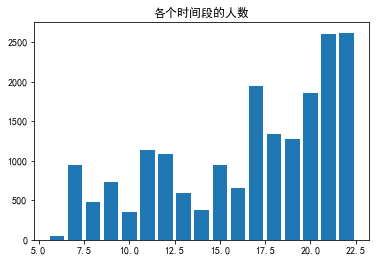

In [77]:
plt.pyplot.bar(dc_count.sj,dc_count.ct)
plt.pyplot.title('各个时间段的人数')

Text(0.5, 1.0, '各个时间段的优秀学生占比')

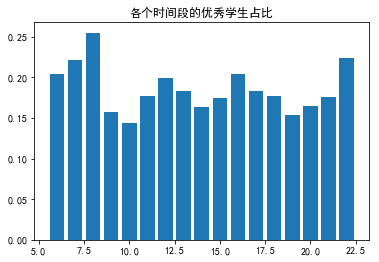

In [78]:
plt.pyplot.bar(dc_count.sj,dc_count.bl)
plt.pyplot.title('各个时间段的优秀学生占比')

4、以同样的处理格式考察同学们的吃饭时间

In [79]:
ylk_dc=ylk_st[0:-30]
ylk_dc["XH"] =ylk_dc["XH"].astype("int64")
ylk_dc = pd.merge(ylk_dc,data_cjs,how="inner",on="XH")
ylk_dc.head()
ylk_dc["!"]=0    #85分信息标记
ylk_dc.head()
def jud(x):
    if x["cj"]>=85.6:
        x["!"]=1
    else:x["!"]=0
    return x
ylk_dc=ylk_dc.apply(jud,axis=1)
ylk_dc.head()

ylk_dc["JYSJS"]=pd.to_datetime(ylk_dc.JYSJ,format="%Y/%m/%d %H:%M:%S")
ylk_dc["JYSJS"]=ylk_dc.apply(lambda x: datetime.strftime(x["JYSJS"],"%H:%M:%S"),axis=1)
ylk_dc.head()

ylk_dc.sort_values(by='JYSJS').head()

#print("按时间切片")
ylk_dc6=ylk_dc.loc[(ylk_dc.JYSJS < "07:00:00")&(ylk_dc.JYSJS >= "06:00:00"),:]
#print("6:00-7:00")
#print(ylk_dc6.JYSJS.count())
ylk_dc7=ylk_dc.loc[(ylk_dc.JYSJS < "08:00:00")&(ylk_dc.JYSJS >= "07:00:00"),:]
#print("7:00-8:00")
#print(ylk_dc7.JYSJS.count())
ylk_dc8=ylk_dc.loc[(ylk_dc.JYSJS < "09:00:00")&(ylk_dc.JYSJS >= "08:00:00"),:]
#print("8:00-9:00")
#print(ylk_dc8.JYSJS.count())
ylk_dc9=ylk_dc.loc[(ylk_dc.JYSJS < "10:00:00")&(ylk_dc.JYSJS >= "09:00:00"),:]
#print("9:00-10:00")
#print(ylk_dc9.JYSJS.count())
ylk_dc10=ylk_dc.loc[(ylk_dc.JYSJS < "11:00:00")&(ylk_dc.JYSJS >= "10:00:00"),:]
#print("10:00-11:00")
#print(ylk_dc10.JYSJS.count())
ylk_dc11=ylk_dc.loc[(ylk_dc.JYSJS < "12:00:00")&(ylk_dc.JYSJS >= "11:00:00"),:]
#print("11:00-12:00")
#print(ylk_dc11.JYSJS.count())
ylk_dc12=ylk_dc.loc[(ylk_dc.JYSJS < "13:00:00")&(ylk_dc.JYSJS >= "12:00:00"),:]
#print("12:00-13:00")
#print(ylk_dc12.JYSJS.count())
ylk_dc13=ylk_dc.loc[(ylk_dc.JYSJS < "14:00:00")&(ylk_dc.JYSJS >= "13:00:00"),:]
#print("13:00-14:00")
#print(ylk_dc13.JYSJS.count())
ylk_dc14=ylk_dc.loc[(ylk_dc.JYSJS < "15:00:00")&(ylk_dc.JYSJS >= "14:00:00"),:]
#print("14:00-15:00")
#print(ylk_dc14.JYSJS.count())
ylk_dc15=ylk_dc.loc[(ylk_dc.JYSJS < "16:00:00")&(ylk_dc.JYSJS >= "15:00:00"),:]
#print("15:00-16:00")
#print(ylk_dc15.JYSJS.count())
ylk_dc16=ylk_dc.loc[(ylk_dc.JYSJS < "17:00:00")&(ylk_dc.JYSJS >= "16:00:00"),:]
#print("16:00-17:00")
#print(ylk_dc16.JYSJS.count())
ylk_dc17=ylk_dc.loc[(ylk_dc.JYSJS < "18:00:00")&(ylk_dc.JYSJS >= "17:00:00"),:]
#print("17:00-18:00")
#rint(ylk_dc17.JYSJS.count())
ylk_dc18=ylk_dc.loc[(ylk_dc.JYSJS < "19:00:00")&(ylk_dc.JYSJS >= "18:00:00"),:]
#print("18:00-19:00")
#print(ylk_dc18.JYSJS.count())
ylk_dc19=ylk_dc.loc[(ylk_dc.JYSJS < "20:00:00")&(ylk_dc.JYSJS >= "19:00:00"),:]
#print("19:00-20:00")
#print(ylk_dc19.JYSJS.count())
ylk_dc20=ylk_dc.loc[(ylk_dc.JYSJS < "21:00:00")&(ylk_dc.JYSJS >= "20:00:00"),:]
#print("20:00-21:00")
#print(ylk_dc20.JYSJS.count())
ylk_dc21=ylk_dc.loc[(ylk_dc.JYSJS < "22:00:00")&(ylk_dc.JYSJS >= "21:00:00"),:]
#print("21:00-22:00")
#print(ylk_dc21.JYSJS.count())
ylk_dc22=ylk_dc.loc[(ylk_dc.JYSJS < "23:00:00")&(ylk_dc.JYSJS >= "22:00:00"),:]
#print("22:00-23:00")
#print(ylk_dc22.JYSJS.count())

dic_dc={"sj":[6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22],
        "ct":[ylk_dc6.JYSJS.count(),ylk_dc7.JYSJS.count(),ylk_dc8.JYSJS.count(),ylk_dc9.JYSJS.count(),
                 ylk_dc10.JYSJS.count(),ylk_dc11.JYSJS.count(),ylk_dc12.JYSJS.count(),ylk_dc13.JYSJS.count(),
                 ylk_dc14.JYSJS.count(),ylk_dc15.JYSJS.count(),ylk_dc16.JYSJS.count(),ylk_dc17.JYSJS.count(),
                 ylk_dc18.JYSJS.count(),ylk_dc19.JYSJS.count(),ylk_dc20.JYSJS.count(),ylk_dc21.JYSJS.count(),
                 ylk_dc22.JYSJS.count()],
       "!":[ylk_dc6["!"].sum(),ylk_dc7["!"].sum(),ylk_dc8["!"].sum(),ylk_dc9["!"].sum(),
                 ylk_dc10["!"].sum(),ylk_dc11["!"].sum(),ylk_dc12["!"].sum(),ylk_dc13["!"].sum(),
                 ylk_dc14["!"].sum(),ylk_dc15["!"].sum(),ylk_dc16["!"].sum(),ylk_dc17["!"].sum(),
                 ylk_dc18["!"].sum(),ylk_dc19["!"].sum(),ylk_dc20["!"].sum(),ylk_dc21["!"].sum(),
                 ylk_dc22["!"].sum()]}
dc_count = pd.DataFrame(dic_dc)
dc_count["bl"] = 0
dc_count["bl"] = dc_count.apply(lambda x: x["!"]/x["ct"],axis=1)
dc_count

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,sj,ct,!,bl
0,6,6136,1624,0.264668
1,7,50385,12155,0.241242
2,8,18911,4258,0.225160
3,9,10975,1566,0.142688
4,10,5515,780,0.141432
5,11,70017,14141,0.201965
6,12,19167,3743,0.195284
7,13,3994,504,0.126189
8,14,1877,207,0.110282
9,15,3302,493,0.149303


Text(0.5, 1.0, '各个时间段的人数')

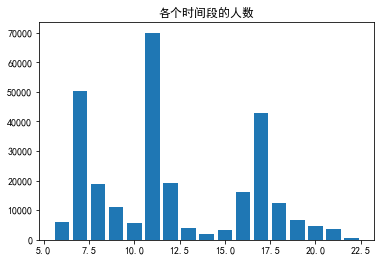

In [80]:
plt.pyplot.bar(dc_count.sj,dc_count.ct)
plt.pyplot.title('各个时间段的人数')

Text(0.5, 1.0, '各个时间段的优秀学生占比')

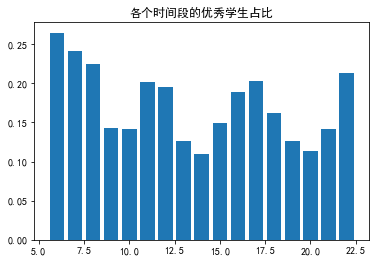

In [81]:
plt.pyplot.bar(dc_count.sj,dc_count.bl)
plt.pyplot.title('各个时间段的优秀学生占比')

In [82]:
end_time=time.perf_counter()
print("程序执行时间（s）")
print(end_time-st_time)

程序执行时间（s）
134.752144912072
